# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

# Data Reading

In [2]:
df = pd.read_csv("train.csv") 
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

## Checking Columns and Rows Null Values

In [5]:
print("The number of missing Values in Cols and Rows are :")
df.isnull().all().sum()

The number of missing Values in Cols and Rows are :


0

In [6]:
100*df.isnull().mean().sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [7]:
#As mentioned in the Data Dictionary NA value means it is not present and thus we can replace it with none
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

### Removing the cols which has more than 30% missing values

In [8]:
rmcols=[]
for i in df.columns:
    if(df[i].isnull().mean()*100>30.00):
        rmcols.append(i)
        
print("Rm cols:")
print(rmcols)

Rm cols:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
df.drop(rmcols,axis=1,inplace=True)
df.shape

(1460, 76)

In [10]:
# We will replace the null with median for LotFrontage MasVnrArea and GarageYrBlt columns
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [11]:
#Validating the null values again
100*df.isnull().mean().sort_values(ascending=False)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
               ... 
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
SalePrice       0.0
Length: 76, dtype: float64

In [12]:
# Dropping Id Col
df=df.drop('Id',axis='columns')

In [13]:
df = df.round(decimals = 2)

In [14]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])


In [15]:
#Lets drop these extra columns :
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df.drop(extraCols,axis=1,inplace=True)
df.shape# verifying the shape of the dataset


(1460, 65)

In [16]:
#Removing col with more than 90% max freq

In [17]:
dropCols = [] 
for i in df.columns :
    if df[i].value_counts().max() >= df.shape[0]*0.90:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [18]:
# Removing these columns
df.drop(dropCols,axis=1,inplace=True)
df.shape

(1460, 50)

In [19]:
# Creating a new Column to determine the age of the property
df['Total_Age']=df['YrSold']-df['YearBuilt']
df['Garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['Remodel_age'] = df['YrSold'] - df['YearRemodAdd']

#Also lets drop out variables like GarageYrBlt and YearRemodAdd as we are already calculating the number of years
drop_cols = ['GarageYrBlt','YearRemodAdd']
df.drop(labels = drop_cols, axis = 1, inplace=True) 
df.shape

(1460, 51)

# EDA

In [20]:
#Lets divide the Columns based on Numerical/continous and categorical
cat_cols = []
num_cols = []
for i in df.columns :
    if df[i].dtype == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)
print("Below are the list of",len(cat_cols) ,"Categorical Columns are :\n")
print(cat_cols,"\n")
print("Below are the list of",len(num_cols) ,"Numerical Columns are :\n")
print(num_cols)

Below are the list of 27 Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


## Univariate Analysis of Categoical variables

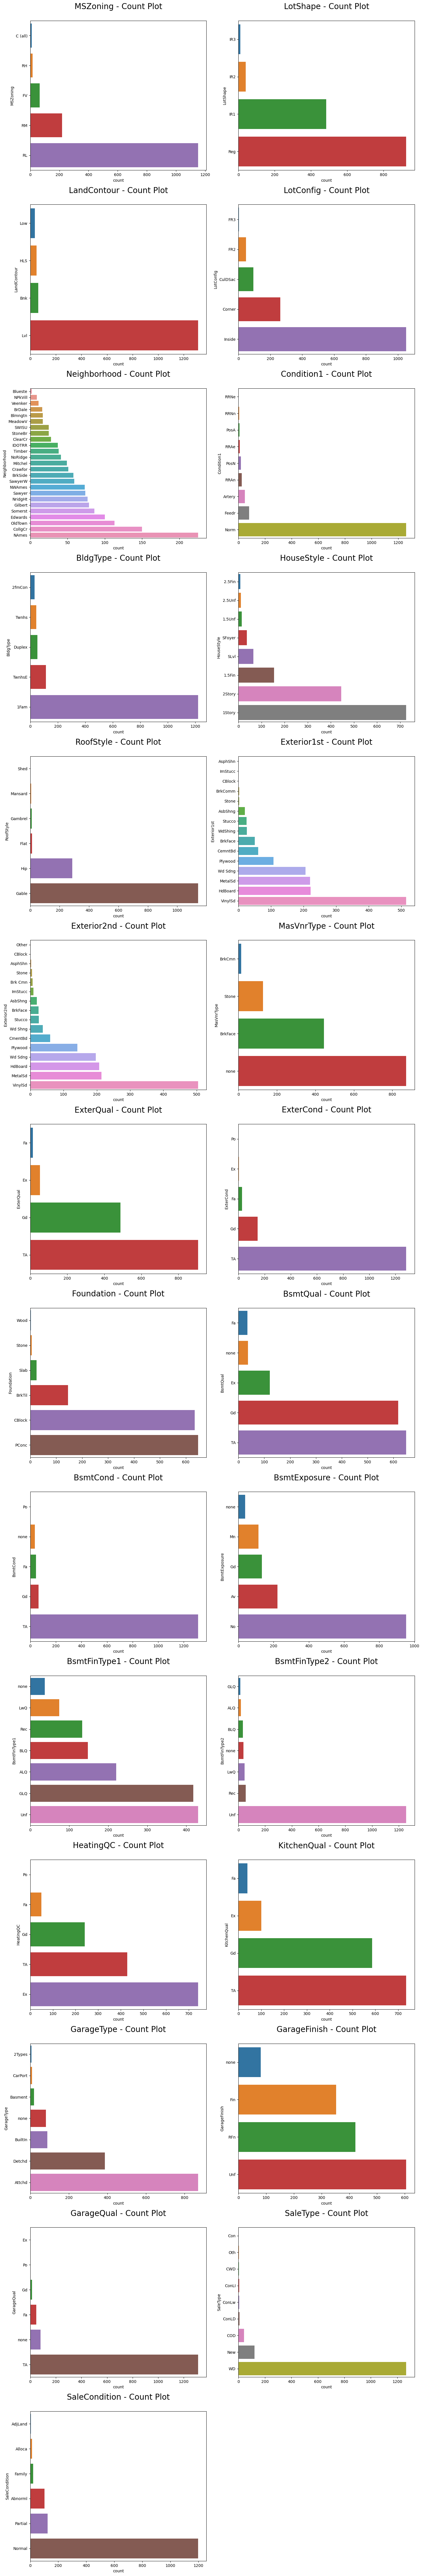

In [21]:
plt.figure(figsize=(15,110))#The size of the plot
c=0
for i in cat_cols:
    c=c+1
    plt.subplot(17,2,c)
    sns.countplot(y=df[str(i)],order=df[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)#The title of the plot
plt.tight_layout()#to avoid overlapping layout
plt.show()

## Outlier Analysis

In [22]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   103.117123   567.240411  1057.429452  1515.463699  ...   
std      30.202904   180.731373   441.866955   438.705324   525.480383  ...   
min    1872.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1954.000000     0.000000   223.000000   795.750000  1129.500000  ...   
50%    1973.000000     0.000000   477.500000   991.500000  1464.000000  ...   
75%    2000.000000   164.250000   808.000000  1298.250000  1776.750000  ...   
90%    2006.000000   335.000000  1232.000000  1602.200000  2158.300000  ...   
95%    2007.000000   456.000000  1468.000000  1753.000000  2466.100000  ...   
99%    2009.000000   791.280000  1797.050000  2155.050000  3123.480000  ...   
max    2010.000000  1600.000000  2336.000000  6110.000000  5642.000000  ...   

        GarageArea       MoSold       YrSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000   
mean    472.980137     6.321918  2007.815753  180921.195890   
std     213.804841     2.703626     1.328095   79442.502883   
min       0.000000     1.000000  2006.000000   34900.000000   
25%     334.500000     5.000000  2007.000000  129975.000000   
50%     480.000000     6.000000  2008.000000  163000.000000   
75%     576.000000     8.000000  2009.000000  214000.000000   
90%     757.100000    10.000000  2010.000000  278000.000000   
95%     850.100000    11.000000  2010.000000  326100.000000   
99%    1002.790000    12.000000  2010.000000  442567.010000   
max    1418.000000    12.000000  2010.000000  755000.000000   

       Total_sqr_footage  Total_Bathrooms  Total_porch_sf    Total_Age  \
count        1460.000000      1460.000000     1460.000000  1460.000000   
mean         1999.808219         2.210616      181.329452    36.547945   
std           773.992942         0.785399      156.656097    30.250152   
min           334.000000         1.000000        0.000000     0.000000   
25%          1493.000000         2.000000       45.000000     8.000000   
50%          1863.500000         2.000000      164.000000    35.000000   
75%          2383.500000         2.500000      266.000000    54.000000   
90%          3023.100000         3.500000      382.000000    84.000000   
95%          3334.150000         3.500000      472.150000    91.000000   
99%          4107.510000         4.000000      670.000000   110.410000   
max         11286.000000         6.000000     1027.000000   136.000000   

        Garage_age  Remodel_age  
count  1460.000000  1460.000000  
mean     29.226712    22.950000  
std      24.034844    20.640653  
min       0.000000    -1.000000  
25%       7.000000     4.000000  
50%      28.000000    14.000000  
75%      46.000000    41.000000  
90%      61.000000    56.000000  
95%      78.000000    58.000000  
99%      90.000000    60.000000  
max     107.000000    60.000000  

[11 rows x 24 columns]

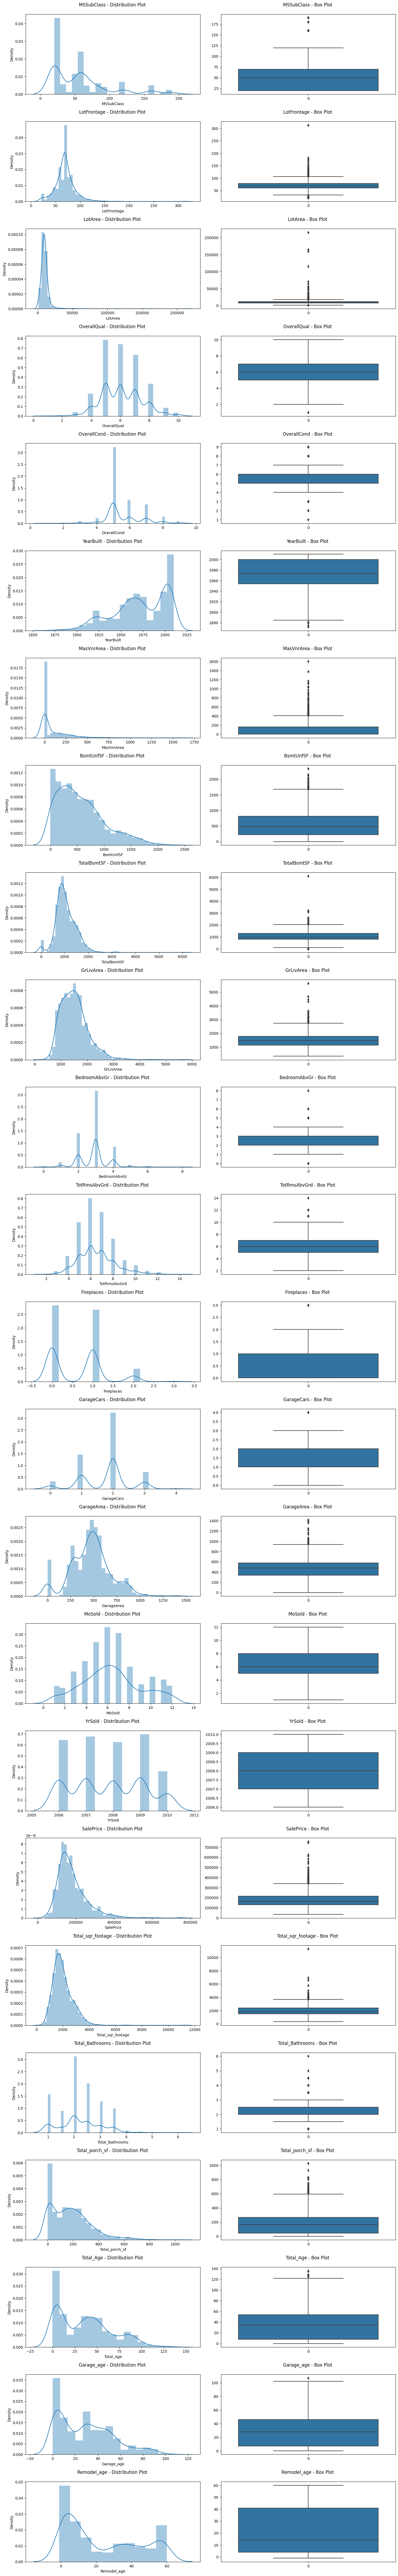

In [23]:
#Lets plot all the numerical columns and observe the outliers
plt.figure(figsize=(15,100))
c=0
for i in num_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(df[str(i)])
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(df[str(i)])
plt.tight_layout()
plt.show()

In [24]:
#As we can observe there are outlier in many columns, listing them below,removing data above 98 percentile
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = df[i].quantile(0.98)
    df = df[df[i] < qnt]
    


In [25]:
df.shape

(1290, 51)

# Bivariate analysis of categorical cols

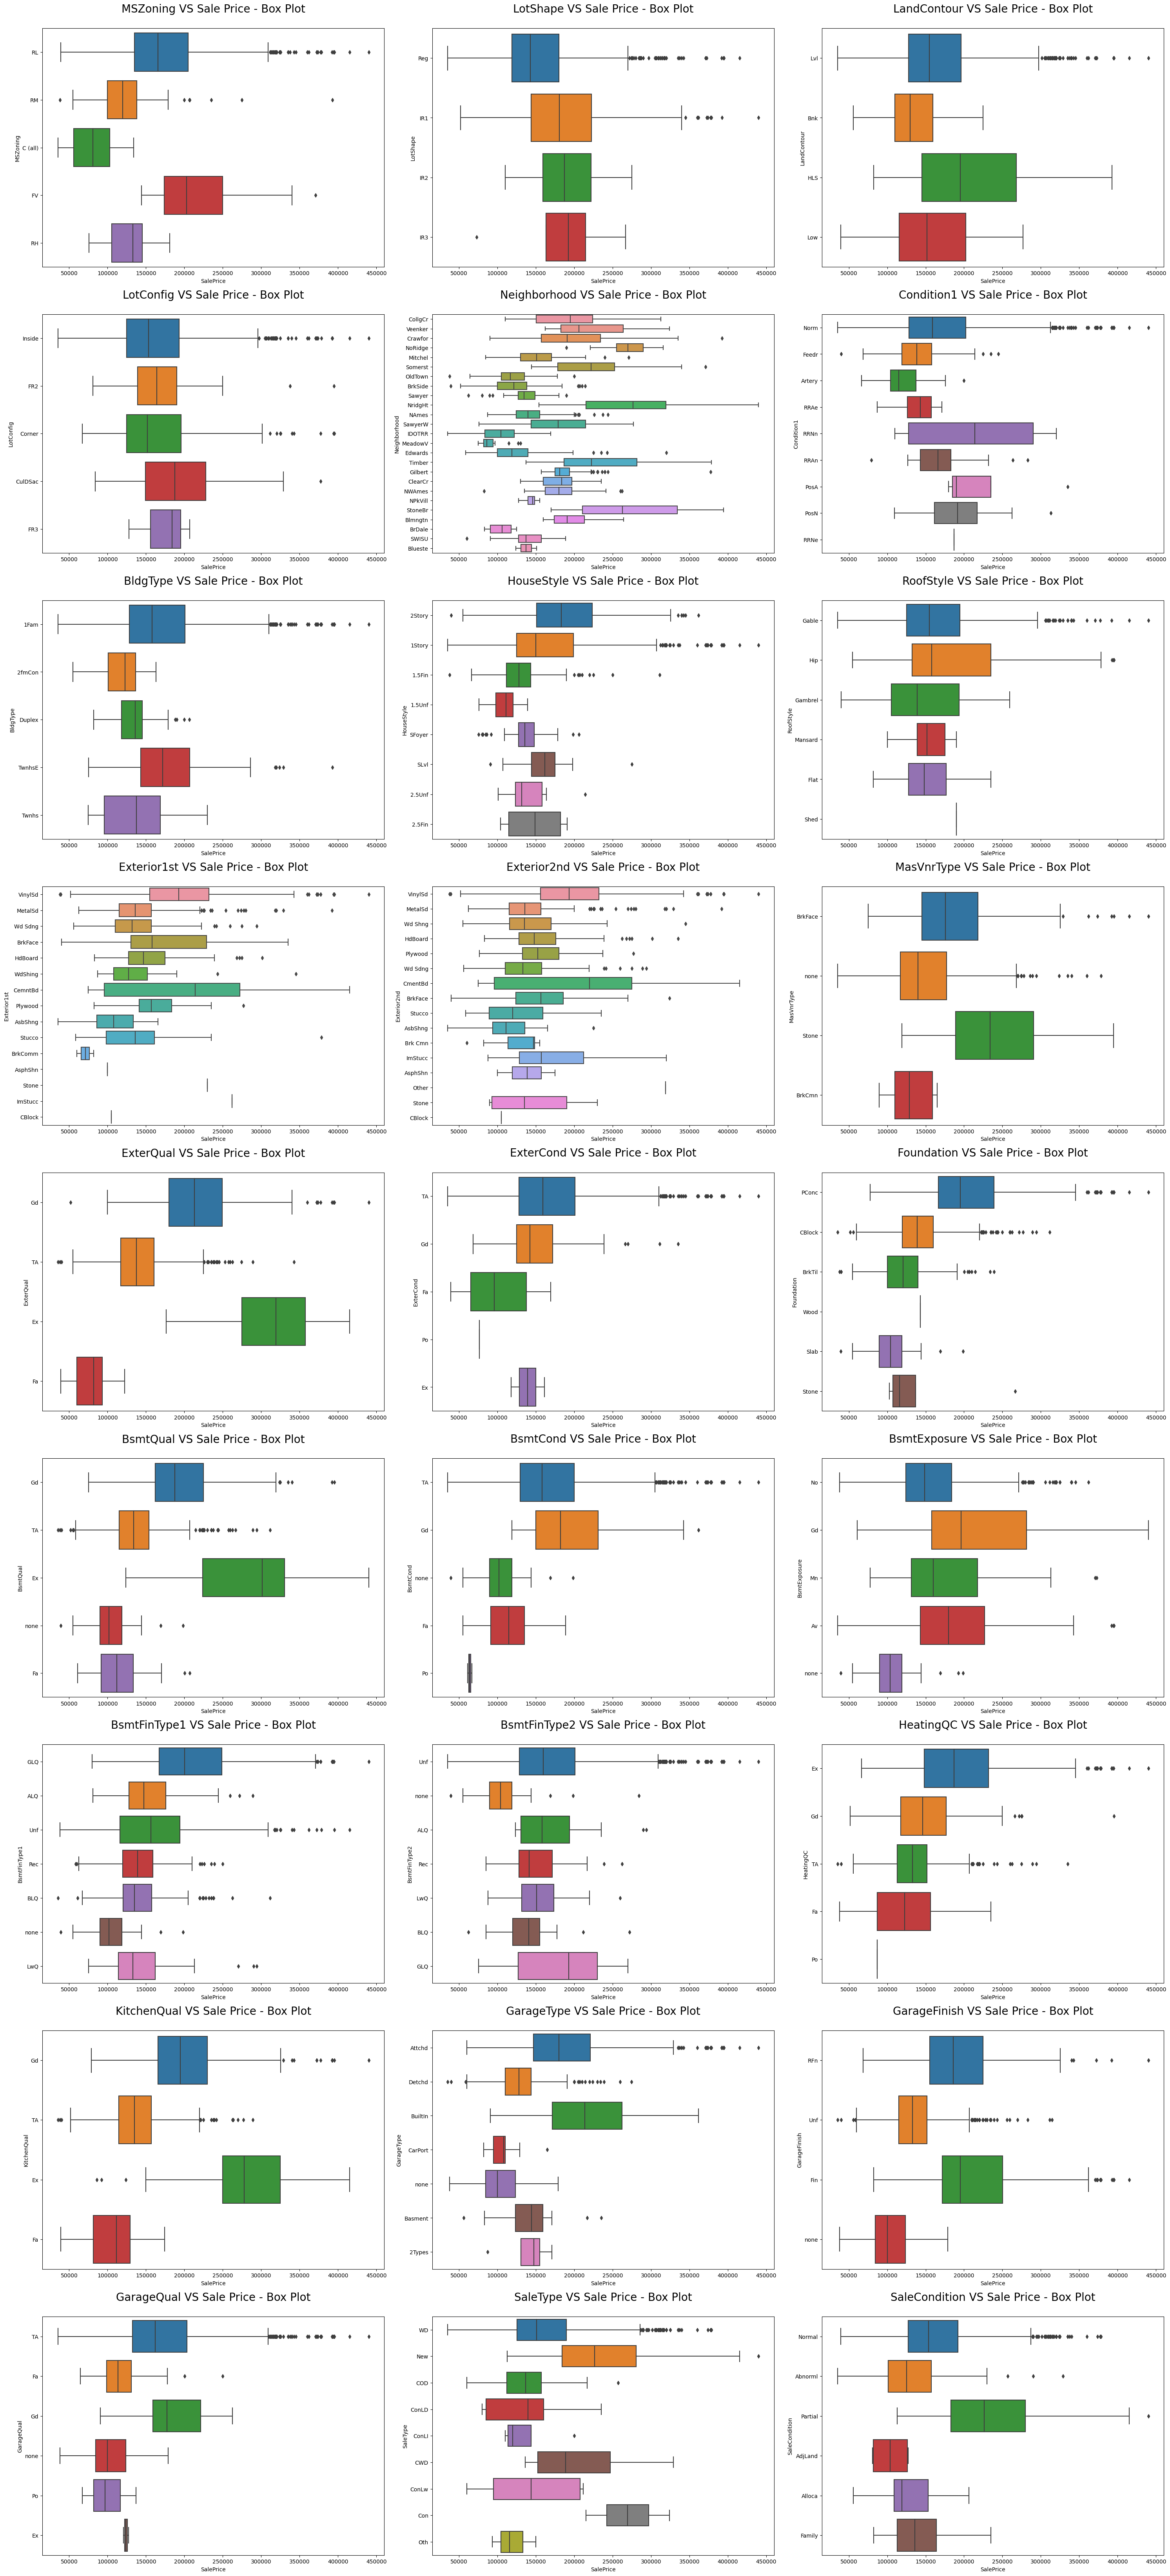

In [26]:
#Lets plot SalePrice against all the categorical columns
plt.figure(figsize=(30,80))#The size of the plot
c=0
for i in cat_cols:
    c=c+1
    plt.subplot(11,3,c)
    sns.boxplot(x = 'SalePrice', y = df[str(i)], data = df)
    plt.title(str(i)+" VS Sale Price - Box Plot\n",fontsize=20)   
plt.tight_layout()
plt.show()


# Bivariate Analysis of Continous Cols

In [27]:
important_num_cols = list(df.corr(numeric_only=True)["SalePrice"][(df.corr(numeric_only=True)["SalePrice"]>0.50) | (df.corr(numeric_only=True)["SalePrice"]<-0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_Age',
 'Garage_age',
 'Remodel_age']

<Figure size 7000x9000 with 0 Axes>

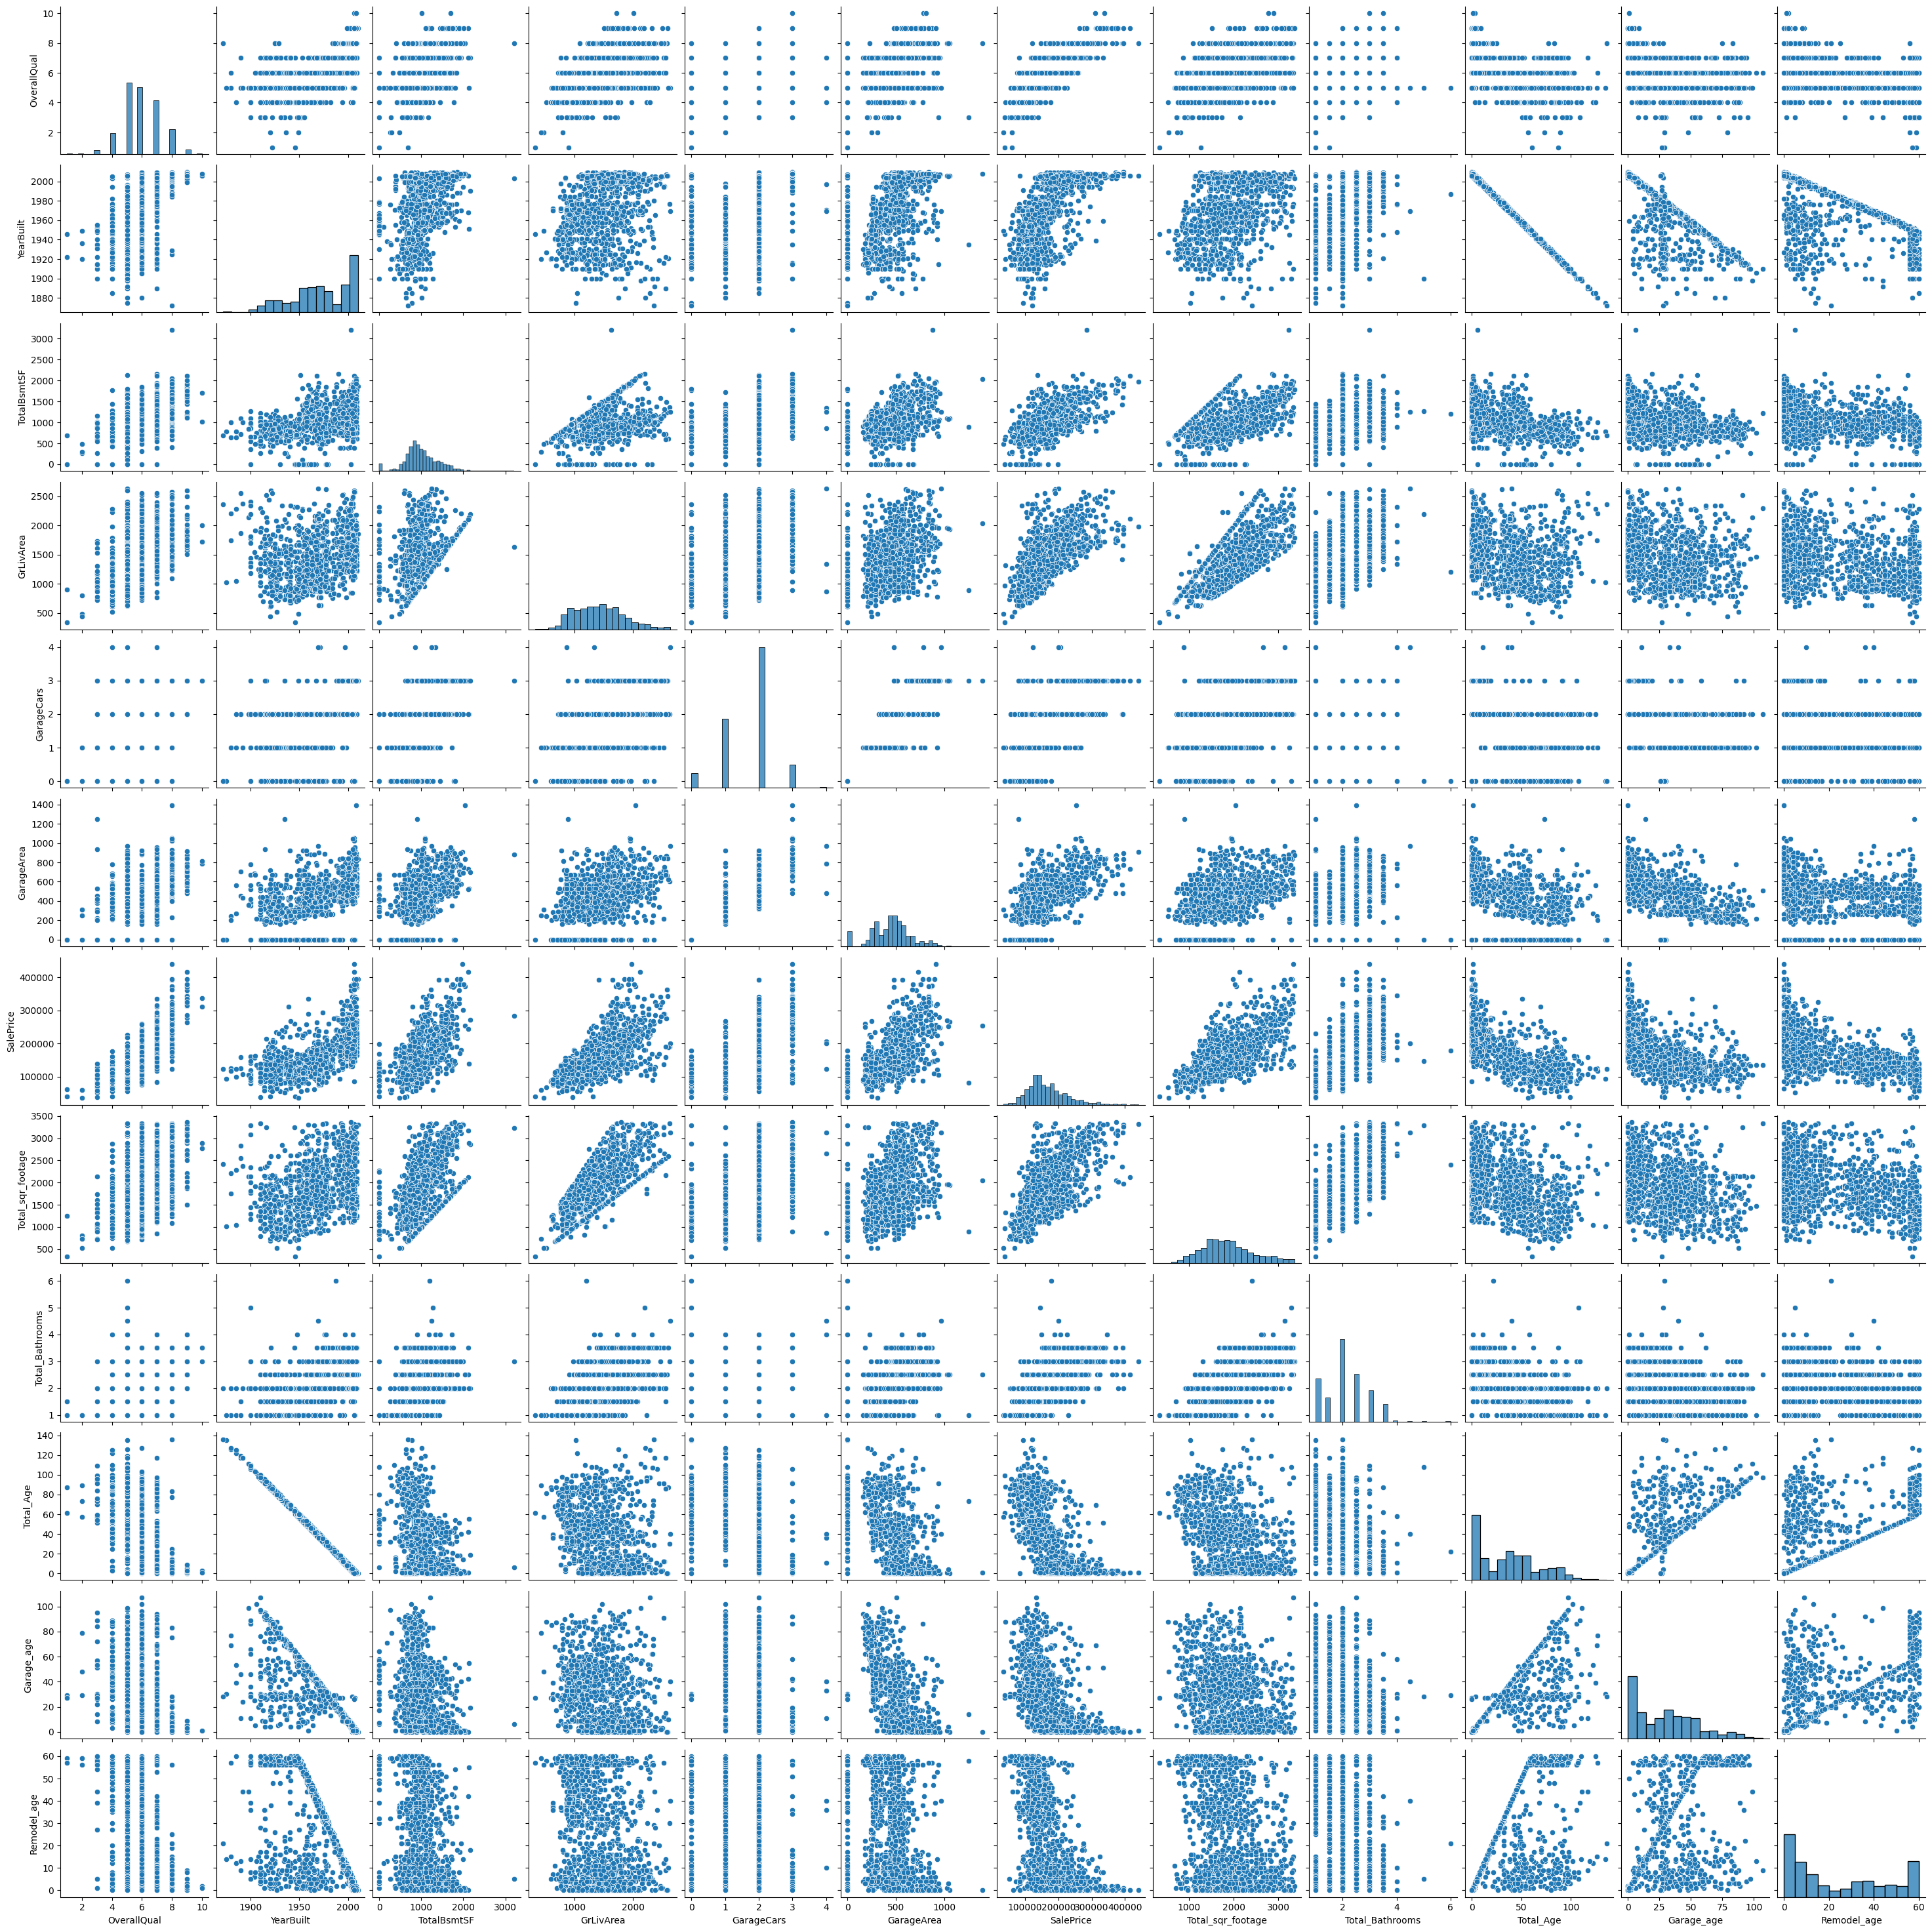

In [28]:
plt.figure(figsize = (70, 90))
sns.pairplot(df, vars= important_num_cols)
plt.show()

In [29]:

# 1)There is a pattern formed between total Total_age and Remodel_age.
# 2)We can observe that the SalesPrice increses with the increase of Total_sqr_footage and that is natural.
# 3)We can observe that the SalesPrice increses with the increase of GrLivArea


# Multivariavte Analysis using Heatmap

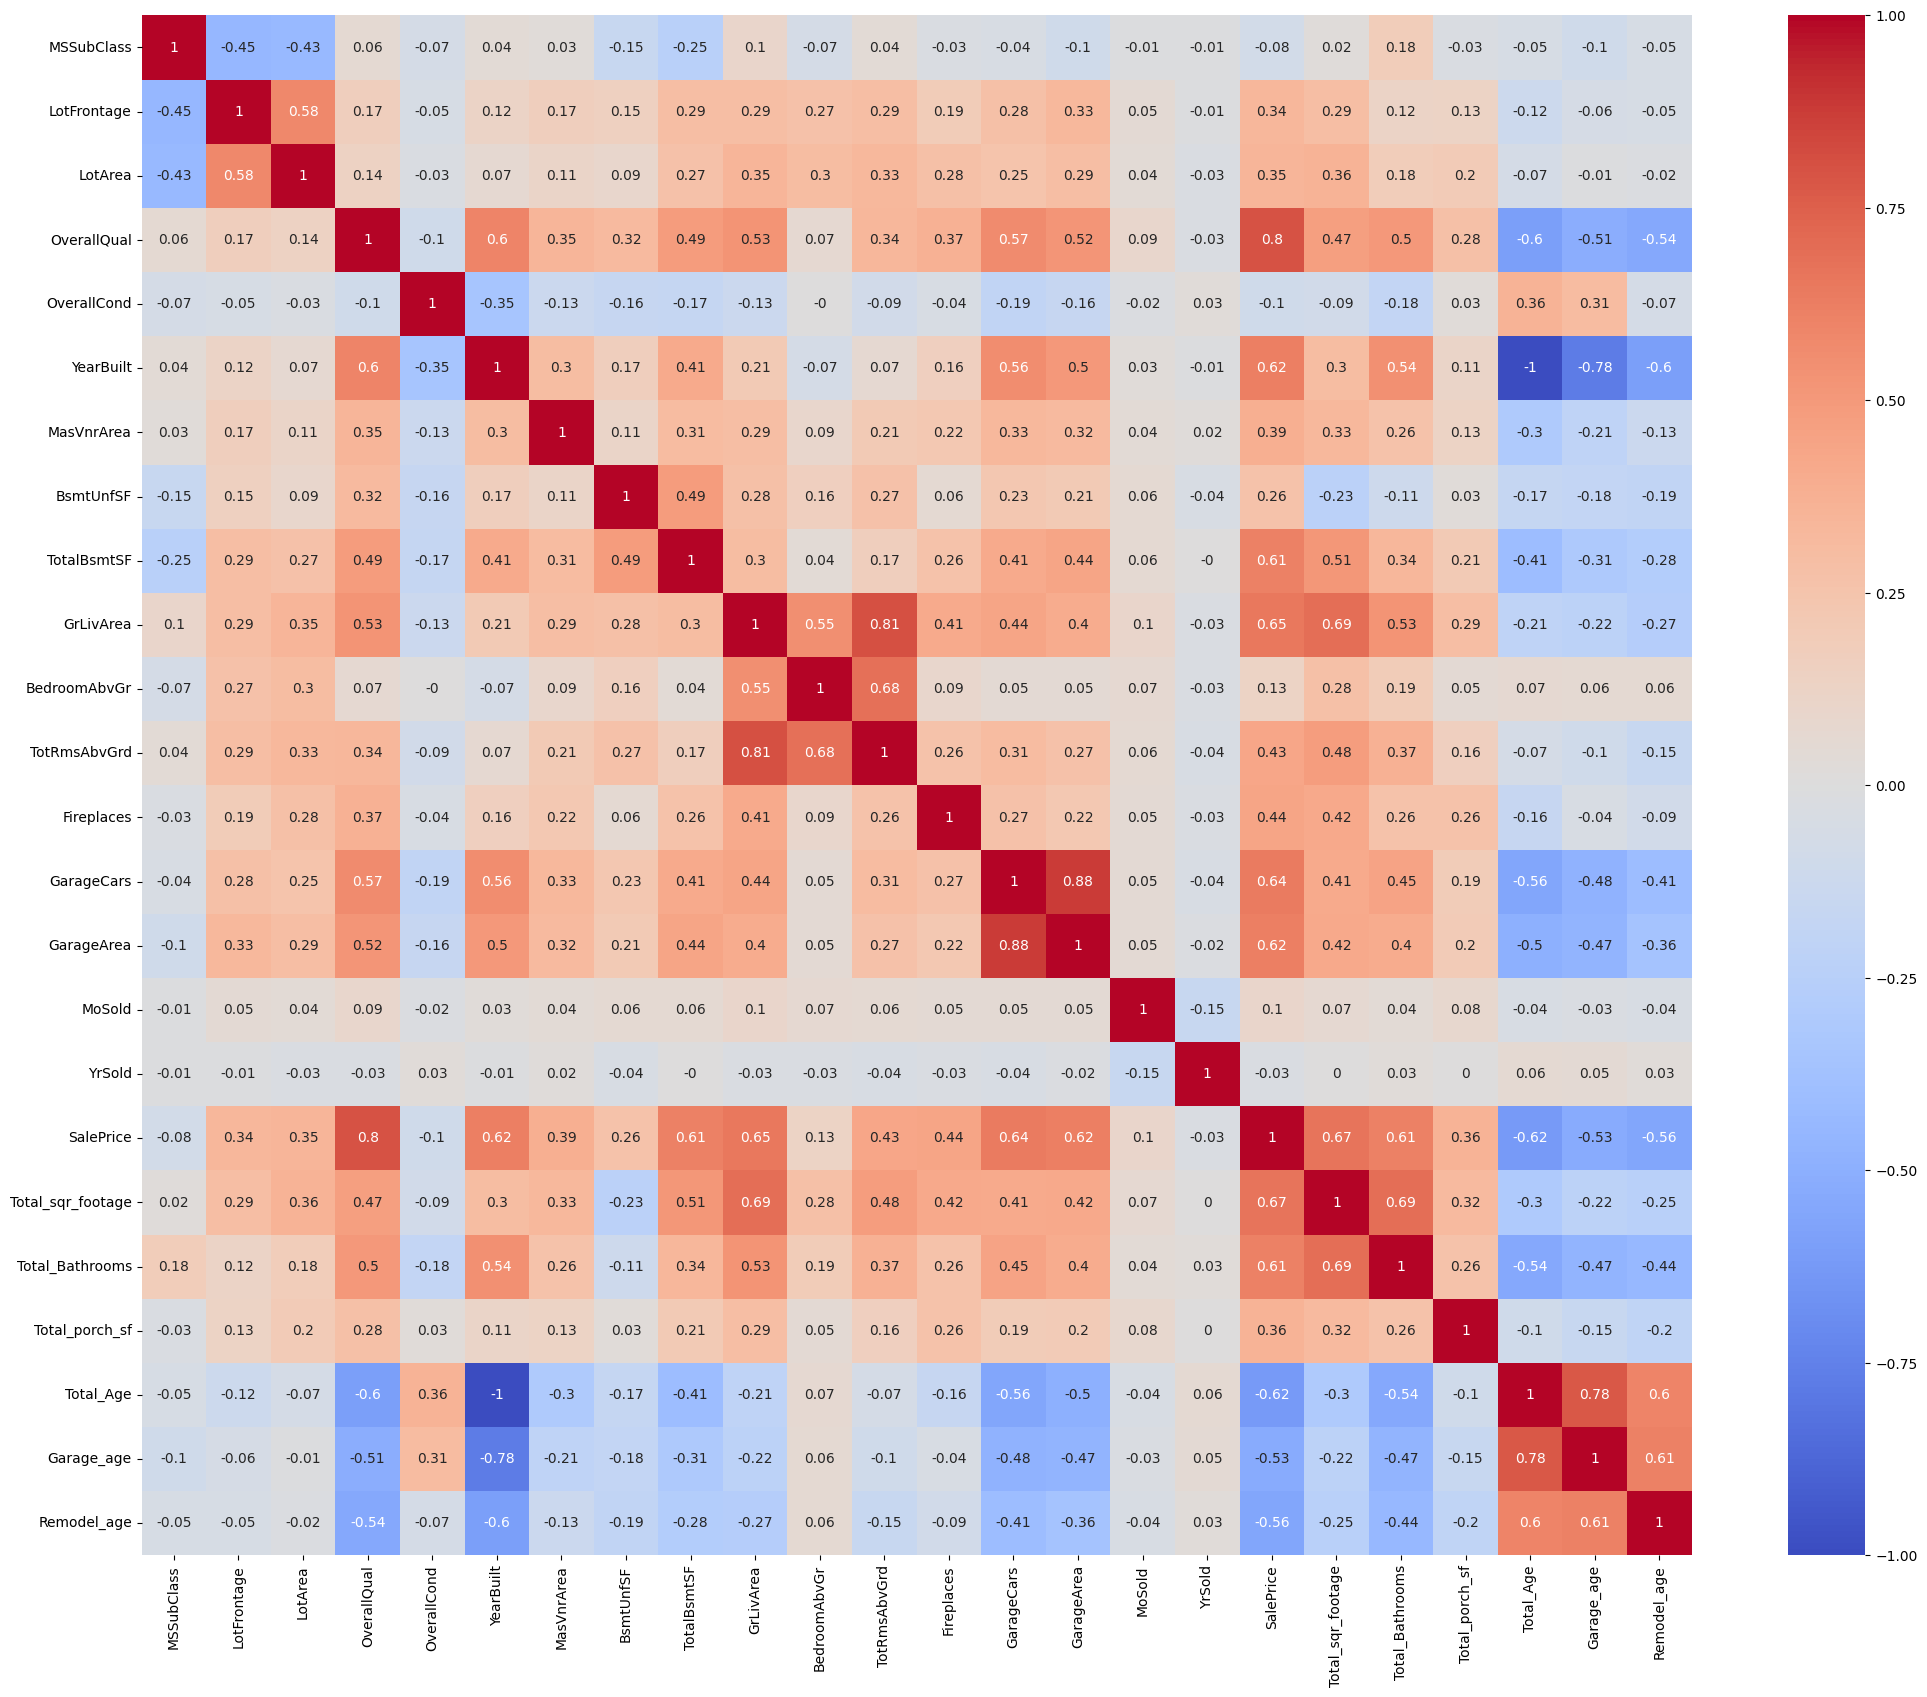

In [30]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df.corr(numeric_only=True),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [31]:

# 1)GarageArea and GarageCars have a strong correlation since both are describing the size.
# 2)TotRmsAbvGrd and GrLivArea have a strong correlation
# 3)GarageAge and TotalAge also have a strong correlation, could be because many garage had been build in the beginning itself Since these pairs have high correlation , we have to drop any 1 during model preparation with the help of p-value and VIF


In [32]:
#Also lets find out which variables has high correlation with SalesPrice
df.corr(numeric_only=True)['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.80
Total_sqr_footage    0.67
GrLivArea            0.65
GarageCars           0.64
YearBuilt            0.62
GarageArea           0.62
TotalBsmtSF          0.61
Total_Bathrooms      0.61
Fireplaces           0.44
TotRmsAbvGrd         0.43
MasVnrArea           0.39
Total_porch_sf       0.36
LotArea              0.35
LotFrontage          0.34
BsmtUnfSF            0.26
BedroomAbvGr         0.13
MoSold               0.10
YrSold              -0.03
MSSubClass          -0.08
OverallCond         -0.10
Garage_age          -0.53
Remodel_age         -0.56
Total_Age           -0.62
Name: SalePrice, dtype: float64

We can clearly observe that the SalesPrice is mostly corelated with variables like OverallQual, GrLivArea, Total_sqr_footage and GarageCars

# Data Preparation

In [33]:
#Lets change the datatype of categorical columns from object to category
cat_cols = []
for i in df.columns :
    if df[i].dtype == "object":
        df[i]=df[i].astype('category')
        cat_cols.append(i)
print("Below are the list of",len(cat_cols) ,"Categorical Columns are :\n")
print(cat_cols)

Below are the list of 27 Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']


In [34]:
df = pd.get_dummies(df,drop_first=True)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...           False   
1         0.0        284         1262       1262  ...           False   
2       162.0        434          920       1786  ...           False   
3         0.0        540          756       1717  ...           False   
4       350.0        490         1145       2198  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 188 columns]

In [35]:
df.shape

(1290, 188)

In [36]:
df = df.astype(float).round(decimals = 2)

In [37]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score 
import statsmodels.api as sm 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import mean_squared_error 


In [38]:
#Here we will keep the train size as 70% and automatically test size will be rest 30%
#Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (902, 188)
The Size of Test data is (388, 188)


# Scaling Features

In [39]:
#Lets extract the numerical columns from the df_train
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [40]:
Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[num_cols] = Scaler.fit_transform(df_train[num_cols])


# Training the Model

In [41]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train

# Model 1 Automated Process using RFE

In [42]:
#Fit the Model
lr = LinearRegression()
#Since we have 147 columns in the X_train, lets select only half of it , say 94 using RFE
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 84),
 ('LotFrontage', False, 88),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 38),
 ('BsmtUnfSF', False, 33),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 68),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 29),
 ('MoSold', False, 94),
 ('YrSold', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', False, 19),
 ('Remodel_age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 59),
 ('LotShape_IR3', False, 20),
 ('LotShape_Reg', False, 87),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 12),
 ('LandContour_Lvl', False, 58),
 ('LotConfig_CulDSac', False, 42),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3'

True means its selected by rfe

In [43]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'YrSold',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age',
       'Remodel_age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_PosN', 'Condition1_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip',

In [44]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'TotRmsAbvGrd',
       'GarageArea', 'MoSold', 'Garage_age', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Shed', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd

In [45]:
#Creating X_train using RFE selected variables
#We are using the function of statsmodels here
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to form the equation y = mx + c
X_train_rfe.shape

(902, 95)

In [46]:
#Running the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:27:10   Log-Likelihood:                 1598.0
No. Observations:                 902   AIC:                            -3026.
Df Residuals:                     817   BIC:                            -2618.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [48]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features   VIF
10                YrSold   inf
87         GarageQual_Gd   inf
67         BsmtCond_none   inf
84       GarageType_none   inf
14             Total_Age   inf
..                   ...   ...
91          SaleType_CWD  1.07
0                  const  0.00
23  Neighborhood_Blueste   NaN
55     Exterior1st_Stone   NaN
59     Exterior2nd_Other   NaN

[95 rows x 2 columns]

# Model Prediction and Evaluation

In [49]:

num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [50]:
for col in df_test.columns:
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
MasVnrArea
BsmtUnfSF
TotalBsmtSF
GrLivArea
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
MoSold
YrSold
SalePrice
Total_sqr_footage
Total_Bathrooms
Total_porch_sf
Total_Age
Garage_age
Remodel_age
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
Condition1_Feedr
Condition1_Norm
C

In [51]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[num_cols] = Scaler.fit_transform(df_test[num_cols])


In [52]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test

# Ridge Regularization

In [53]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026751        -0.032520                1
14         3.0         -0.027240        -0.032601                2
12         1.0         -0.026271        -0.032767                3
11         0.9         -0.026222        -0.032838                4
15         4.0         -0.027711        -0.032840                5
10         0.8         -0.026170        -0.032917                6
9          0.7         -0.026117        -0.033011                7
8          0.6         -0.026064        -0.033128                8
16         5.0         -0.028175        -0.033141                9
7          0.5         -0.026007        -0.033267               10
6          0.4         -0.025946        -0.033429               11
17         6.0         -0.028637        -0.033472               12
5          0.3         -0.025880        -0.033619               13
18         7.0         -0.029074        -0.033819               14
4          0.2         -0.025811        -0.033861               15
19         8.0         -0.029504        -0.034166               16
3          0.1         -0.025740        -0.034176               17
20         9.0         -0.029928        -0.034500               18
2         0.01         -0.025652        -0.034638               19
1        0.001         -0.025647        -0.034735               20
0       0.0001         -0.025646        -0.034747               21
21        10.0         -0.030333        -0.034827               22
22          20         -0.033691        -0.037750               23
23          50         -0.040122        -0.043492               24
24         100         -0.046314        -0.049056               25
25         500         -0.063810        -0.065262               26

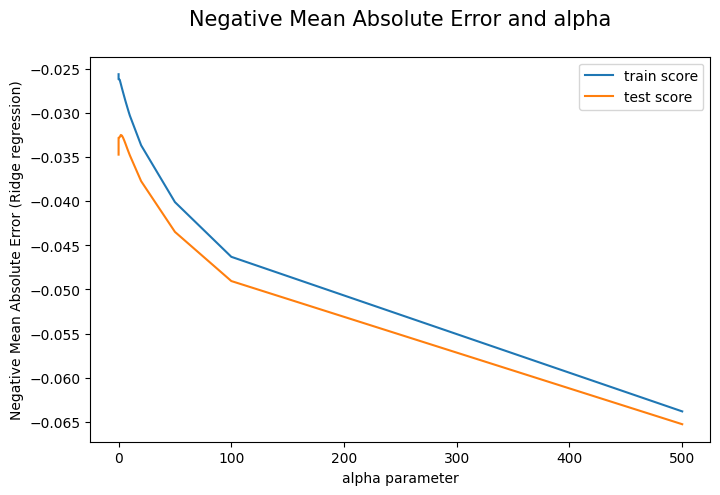

In [55]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
ridge_model_cv.best_params_

{'alpha': 2.0}

In [57]:
# Hyperparameter lambda = 1.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.15967294e-02,  8.72874756e-03,  5.90657088e-02,  1.25708857e-01,
        8.22762391e-02,  5.65255721e-02,  1.27662689e-02,  2.17304320e-02,
        6.10355911e-02,  1.15410207e-01, -7.31727777e-03,  2.57813659e-02,
        3.82130805e-02,  3.15530296e-02,  2.24823962e-02,  1.46994611e-03,
        2.97646303e-03,  1.30451474e-01,  3.61301035e-02,  3.20426895e-02,
       -5.72692875e-02, -1.16891073e-02, -2.29700447e-02,  3.24222765e-02,
       -2.85147811e-03,  2.43590841e-02,  6.71664837e-03, -8.79387901e-04,
       -6.96338530e-03,  2.70226695e-04,  1.55761534e-02, -1.91971332e-02,
       -4.65432462e-03,  1.24156035e-02, -1.79408157e-02, -1.17855474e-02,
       -9.85275372e-04,  0.00000000e+00,  1.28248474e-02,  1.21020764e-02,
       -2.15446710e-02, -2.02172861e-02,  4.82311051e-02, -3.44218973e-02,
       -2.88116140e-02, -2.08466983e-04, -1.62880808e-03, -3.84039535e-02,
       -2.52320684e-02,  1.98944975e-02, -2.46135054e-02,  1.43054714e-02,
        3.99500699e-02, -

In [58]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.002970672502522993


In [59]:
# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9300686658578847


In [60]:
#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8967971059997573


In [61]:
# Lets observe the porameters by changing +1 and -1 of the alpha value
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.002979726605006831
The r2 value of train data is  0.9300686658578847
The r2 value of test data is  0.8967971059997573

The output when alpha is 2: 
The mean squared error value is  0.002970672502522993
The r2 value of train data is  0.9300686658578847
The r2 value of test data is  0.8967971059997573

The output when alpha is 3: 
The mean squared error value is  0.0029929071574060096
The r2 value of train data is  0.9300686658578847
The r2 value of test data is  0.8967971059997573


In [62]:
# as we can see alpha=2 is best value .
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0333
1              LotFrontage       0.0111
2                  LotArea       0.0554
3              OverallQual       0.1175
4              OverallCond       0.0762
..                     ...          ...
182  SaleCondition_AdjLand       0.0140
183   SaleCondition_Alloca       0.0077
184   SaleCondition_Family      -0.0033
185   SaleCondition_Normal       0.0178
186  SaleCondition_Partial       0.0242

[187 rows x 2 columns]

In [63]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0333,
 'LotFrontage': 0.0111,
 'LotArea': 0.0554,
 'OverallQual': 0.1175,
 'OverallCond': 0.0762,
 'YearBuilt': 0.0516,
 'MasVnrArea': 0.0145,
 'BsmtUnfSF': 0.022,
 'TotalBsmtSF': 0.0593,
 'GrLivArea': 0.1087,
 'BedroomAbvGr': -0.0038,
 'TotRmsAbvGrd': 0.029,
 'Fireplaces': 0.04,
 'GarageCars': 0.0316,
 'GarageArea': 0.0249,
 'MoSold': 0.0018,
 'YrSold': 0.0029,
 'Total_sqr_footage': 0.1258,
 'Total_Bathrooms': 0.037,
 'Total_porch_sf': 0.0325,
 'Total_Age': -0.0523,
 'Garage_age': -0.0119,
 'Remodel_age': -0.0247,
 'MSZoning_FV': 0.0283,
 'MSZoning_RH': -0.0047,
 'MSZoning_RL': 0.0225,
 'MSZoning_RM': 0.0043,
 'LotShape_IR2': 0.0001,
 'LotShape_IR3': -0.0057,
 'LotShape_Reg': -0.0002,
 'LandContour_HLS': 0.0164,
 'LandContour_Low': -0.017,
 'LandContour_Lvl': -0.0042,
 'LotConfig_CulDSac': 0.0134,
 'LotConfig_FR2': -0.0172,
 'LotConfig_FR3': -0.009,
 'LotConfig_Inside': -0.0009,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.0111,
 'Neighborhood_BrkSide': 0.

In [64]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [65]:
#  coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0         OverallQual         True            1       0.1175
2         TotalBsmtSF         True            1       0.0593
1           YearBuilt         True            1       0.0516
18      GarageQual_TA         True            1       0.0089
16      GarageQual_Gd         True            1       0.0078
3              YrSold         True            1       0.0029
14  GarageFinish_none         True            1       0.0019
13    GarageType_none         True            1       0.0019
19    GarageQual_none         True            1       0.0019
9   Exterior2nd_Other         True            1       0.0000

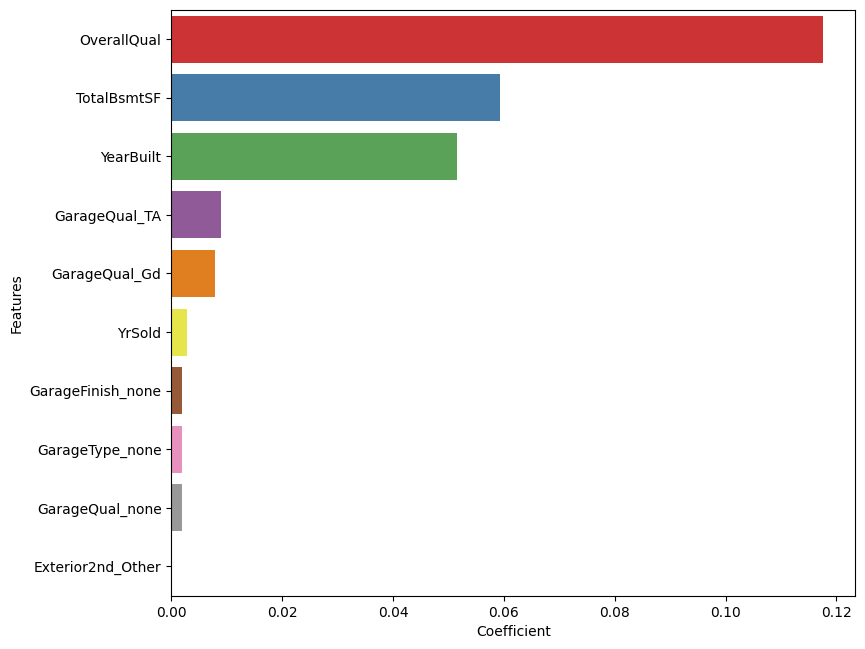

In [66]:
# bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

# Lasso Regularization

In [67]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.027431        -0.032533                1
1       0.0002         -0.028464        -0.032888                2
2       0.0003         -0.029389        -0.033558                3
3       0.0004         -0.030157        -0.034208                4
4       0.0005         -0.030908        -0.034920                5
5        0.001         -0.034781        -0.038554                6
6        0.002         -0.040726        -0.043847                7
7        0.003         -0.045164        -0.047625                8
8        0.004         -0.049240        -0.051490                9
9        0.005         -0.052922        -0.054936               10
10        0.01         -0.067644        -0.068912               11

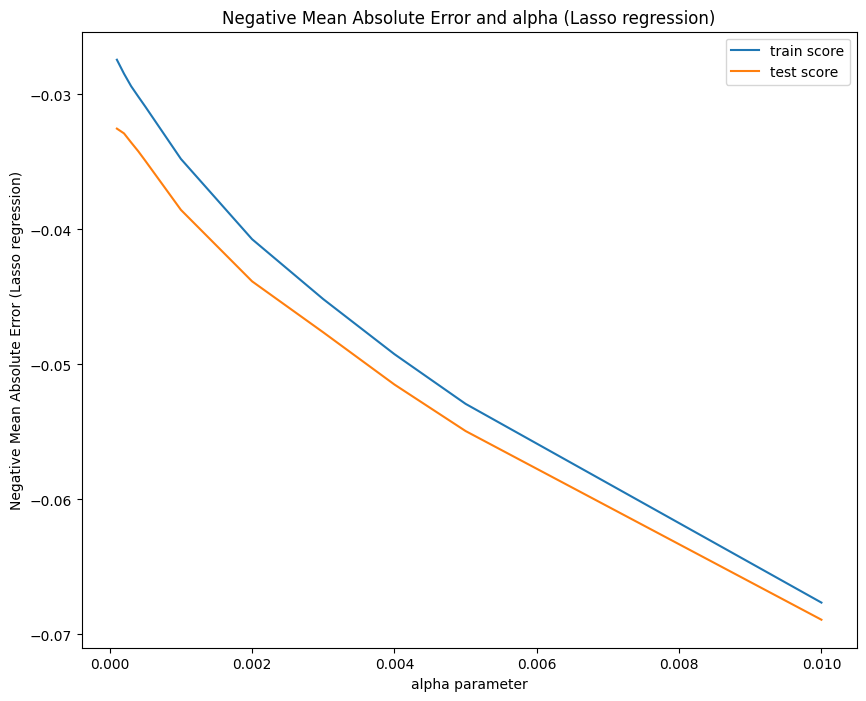

In [69]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [70]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [71]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.12420162e-02,  2.17430909e-03,  5.97472461e-02,  1.62766132e-01,
        9.45945331e-02,  1.34296627e-01,  7.95062372e-03,  0.00000000e+00,
        9.25529441e-02,  1.54750994e-01, -0.00000000e+00,  0.00000000e+00,
        3.28373809e-02,  3.98233201e-02,  5.90279317e-03, -0.00000000e+00,
        5.53863919e-04,  1.18878754e-01,  1.97042605e-02,  3.04676331e-02,
       -0.00000000e+00, -1.12905864e-02, -1.92404349e-02,  2.38521767e-02,
       -2.05826159e-03,  1.64375373e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.48709343e-04,  1.39606155e-02, -1.04254232e-02,
       -0.00000000e+00,  1.16278349e-02, -1.29814868e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.19953533e-02,
       -1.05525505e-02, -1.57661818e-02,  5.00466981e-02, -2.77715858e-02,
       -2.26422597e-02,  0.00000000e+00,  0.00000000e+00, -3.84159396e-02,
       -2.20374041e-02,  8.73376247e-03, -2.22915351e-02,  7.78911805e-03,
        4.25104994e-02, -

In [72]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.002800047511156501


In [73]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.9273710471912475
The r2 value of train data is  0.9273710471912475


In [74]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.90272471763747


In [75]:
# Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0               MSSubClass      -0.0412
1              LotFrontage       0.0022
2                  LotArea       0.0597
3              OverallQual       0.1628
4              OverallCond       0.0946
..                     ...          ...
105            SaleType_WD      -0.0036
106  SaleCondition_AdjLand       0.0022
107   SaleCondition_Family      -0.0010
108   SaleCondition_Normal       0.0146
109  SaleCondition_Partial       0.0320

[110 rows x 2 columns]

In [76]:
# dictionary of Features and Coefficients
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.041242016166254516,
 'LotFrontage': 0.002174309085528236,
 'LotArea': 0.05974724605552109,
 'OverallQual': 0.16276613206473733,
 'OverallCond': 0.09459453311102967,
 'YearBuilt': 0.13429662713092969,
 'MasVnrArea': 0.00795062371775566,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.09255294409781167,
 'GrLivArea': 0.1547509942103618,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.032837380912619056,
 'GarageCars': 0.039823320053995956,
 'GarageArea': 0.005902793172201761,
 'MoSold': -0.0,
 'YrSold': 0.0005538639192587139,
 'Total_sqr_footage': 0.11887875372965173,
 'Total_Bathrooms': 0.019704260516933816,
 'Total_porch_sf': 0.030467633073190042,
 'Total_Age': -0.0,
 'Garage_age': -0.011290586381391264,
 'Remodel_age': -0.019240434914389405,
 'MSZoning_FV': 0.023852176713664363,
 'MSZoning_RH': -0.0020582615872963175,
 'MSZoning_RL': 0.016437537345446528,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': 0.0002487093431446815,
 'L

In [77]:
X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [78]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1            OverallQual         True            1     0.162766
5              GrLivArea         True            1     0.154751
3              YearBuilt         True            1     0.134297
7      Total_sqr_footage         True            1     0.118879
11  Neighborhood_StoneBr         True            1     0.097017
2            OverallCond         True            1     0.094595
4            TotalBsmtSF         True            1     0.092553
0                LotArea         True            1     0.059747
8   Neighborhood_Crawfor         True            1     0.050047
10  Neighborhood_NridgHt         True            1     0.042510

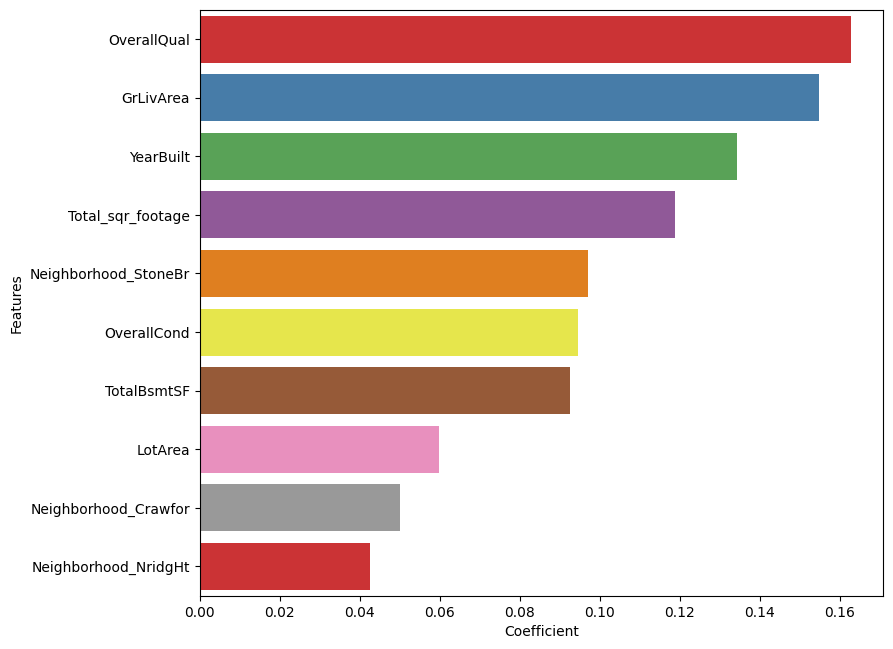

In [79]:
#  bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [80]:
#lets predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.90272471763747


# Conclusion

The optimal value of lambda for Ridge and Lasso is :
- Ridge - **2.0**
- Lasso - **0.0001**

The r2 value for Ridge and Lasso is:
- Ridge - Train = **0.930** , Test = **0.896**
- Lasso - Train = **0.927** , Test = **0.902**

The Mean Squared error for Ridge and Lasso is:
- Ridge - **0.00297**
- Lasso - **0.00280**

From this we can say that Lasso has better performance over Ridge

### LASSO Regularization the TOP 5 Predicted variables :

1. **OverallQual** - With the increase of the overall material and finish of the house, the house price also increases.
2. **GrLivArea** - With the increase of size of the living area square feet, the house price also increases.
3. **YearBuild** - With the increase of age of the house, the price gradually increases. 
4. **Total_sqr_footage** - With the increase of the overall square feet of the house, the house price also increases.
5. **Neighborhood_StoneBr** - Depending upon the Stone Brook location, the house price also increases.

# Assignment Part two

In [81]:
# Question 1

In [82]:
#Lets find for Ridge first
alpha = 2.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 4.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 4: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 2: 
The mean squared error value is  0.002970672502522993
The r2 value of train data is  0.9273710471912475
The r2 value of test data is  0.90272471763747

The output when alpha is 4: 
The mean squared error value is  0.003028378822100229
The r2 value of train data is  0.9273710471912475
The r2 value of test data is  0.90272471763747


In [83]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 4 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 4 are :

                      Coefficient
Total_sqr_footage        0.121485
OverallQual              0.110806
GrLivArea                0.103789
Neighborhood_StoneBr     0.080577
OverallCond              0.071055
TotalBsmtSF              0.057590
LotArea                  0.052714
YearBuilt                0.047783
Neighborhood_Crawfor     0.046705
Fireplaces               0.041324


In [84]:
#Now lets calculate for Lasso
alpha = 0.0001 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0001: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0002: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 0.0001: 
The mean squared error value is  0.002800047511156501
The r2 value of train data is  0.9273710471912475
The r2 value of test data is  0.90272471763747

The output when alpha is 0.0002: 
The mean squared error value is  0.0032779769984862877
The r2 value of train data is  0.9227869971250917
The r2 value of test data is  0.8861211687176225


In [85]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0002 are:

                      Coefficient
Total_sqr_footage        0.185429
OverallQual              0.172690
YearBuilt                0.119993
GrLivArea                0.105465
Neighborhood_StoneBr     0.093874
OverallCond              0.089137
LotArea                  0.054712
Neighborhood_Crawfor     0.053322
Neighborhood_NridgHt     0.047466
GarageCars               0.044402


In [86]:
# Question 3

In [87]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['OverallQual','GrLivArea','YearBuilt','Total_sqr_footage','Neighborhood_StoneBr']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(902, 182)
(388, 182)


In [88]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

                 Coefficient
TotalBsmtSF         0.323329
TotRmsAbvGrd        0.126096
OverallCond         0.094291
Total_Bathrooms     0.086659
LotArea             0.067859
